In [54]:
# Amirreza Eftekhari - 99243014
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In this section you should extract some information about the [Football Events](https://www.kaggle.com/datasets/secareanualin/football-events?select=events.csv) dataset.<br>
1. Your plots must be informative.anyone who looks at your plot must understand it without knowing the code behind it.use label, title, legend,... in your plots to do so.
2. You must not use for/while loops in this section.
3. Writing the answer in markdown in the notebook has extra points. 


## Q0. Import the datasets
1. import the datasets into pandas.DataFrame objects.
2. get some insight about the dataset(use head, dtypes,colmns, ...)
the more you do in this part the better.


In [2]:
# these pathes are in my laptop
df_events = pd.read_csv(r'E:\Uni\Term 6 - Spring 1402\Courses\AI\HWs\2\ans-code\events.csv') # part 1 of Q0
df_ginf = pd.read_csv(r'E:\Uni\Term 6 - Spring 1402\Courses\AI\HWs\2\ans-code\ginf.csv') # part 1 of Q0

#df_events.head() - part 2 of Q0
#df_events.info() - part 2 of Q0

#df_ginf.head() - part 2 of Q0
#df_ginf.info() - part 2 of Q0

## Q1. Delete the rows without detailed event data.

In [3]:
df_ginf = df_ginf[df_ginf.adv_stats == True] # put new data frame to df_ginf that all adv_stats are True

## Q2. Extract the top most eventfull games
1. Write a function that returns the top n most eventfull games as pandas.DataFrame
2. plot the 10 top games using the function above with a <b>horizontal bar chart</b>.<br>
<b>be carefull not to use game-id's in the plot, use their name.</b>


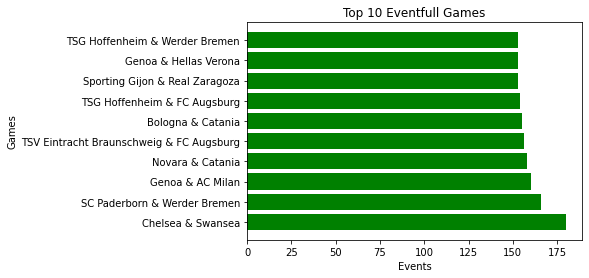

In [37]:
def eventfull_games(n): # part 1 of Q2
    eventfull_df = df_events["id_odsp"].value_counts().nlargest(n).to_frame() # convert series to data frame
    eventfull_df = eventfull_df.reset_index()  # put index for each of them
    eventfull_df.columns = ["id_odsp", "repeats"] # put column for repeats of each game
    eventfull_df = eventfull_df.merge(df_ginf, on= "id_odsp") # merge with df_ginf based on id_odsp
    
    eventfull_df = eventfull_df.loc[:,["repeats", "ht", "at"]] # get these 3 columns 
    eventfull_df["games"] = eventfull_df["ht"].astype(str) +" & "+ eventfull_df["at"] # merge ht and at columns with '&'
    
    del eventfull_df["ht"] # delete ht column - no need anymore
    del eventfull_df["at"] # delete at column - no need anymore
    
    return eventfull_df

top10 = eventfull_games(10) 
plt.barh(top10["games"], top10["repeats"], color="green") # part 2 of Q2
plt.title("Top 10 Eventfull Games")
plt.xlabel("Events")
plt.ylabel("Games")
plt.show()

## Q3. What are the most frequent events?
1. Write a function that returns the n most frequent events as pandas.DataFrame
2. plot the 5 most frequent events  using the function above with a <b>Pie chart</b>.<br>

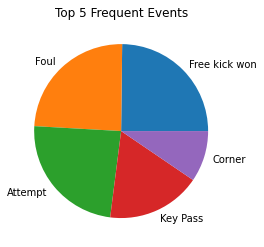

In [39]:
# I combined two event types and find n most frequent events between them
dic_eventType = {   # dictionary for event types based on given data in dictionary.txt
        0: "Announcement",
        1: "Attempt",
        2: "Corner",
        3: "Foul",
        4: "Yellow card",
        5: "Second yellow card",
        6: "Red card",
        7: "Substitution",
        8: "Free kick won",
        9: "Offside",
        10: "Hand ball",
        11: "Penalty conceded",
        12: "Key Pass",
        13: "Failed through ball",
        14: "Sending off",
        15: "Own goal"
    }

def frequent_events(n): # part 1 of Q3
 
    # freq_event_df has n largest counts for event_type
    freq_events_df = df_events.loc[:, ["event_type"]]
    freq_events_df = freq_events_df["event_type"].value_counts().nlargest(n)
    freq_events_df = freq_events_df.reset_index()

    # freq_event2_df has n largest counts for event_type2
    freq_events2_df = df_events.loc[:,["event_type2"]]
    freq_events2_df = freq_events2_df["event_type2"].value_counts().nlargest(n)
    freq_events2_df = freq_events2_df.reset_index()
    
    # all_freq_events_df has the combination of two event types in a column named "allEventTypes"
    all_freq_events_df = pd.concat([freq_events_df, freq_events2_df])
    all_freq_events_df["allEventTypes"] = all_freq_events_df["event_type"].fillna(all_freq_events_df["event_type2"])
    
    del all_freq_events_df["event_type"]  # delete type 1 - no need anymore because we have allEventTypes
    del all_freq_events_df["event_type2"] # delete type 2 - no need anymore because we have allEventTypes
    
    all_freq_events_df = all_freq_events_df.nlargest(n, ["allEventTypes"]) # get n largest
    all_freq_events_df.columns = ["keyOfEvents","repeats"] # put columns
    
    all_freq_events_df["event_name"] = all_freq_events_df["keyOfEvents"].map(dic_eventType) # map with dic_eventType dictionary
    del all_freq_events_df["keyOfEvents"]  # delete keyOfEvents - no need anymore because we have their names
    
    return all_freq_events_df


top5 = frequent_events(5)
plt.pie(top5["repeats"], labels = top5["event_name"]) # part 2 of Q3
plt.title("Top 5 Frequent Events")
plt.show()

## Q4. Find the distribution of the time each goal is scored.
In this part we want to notice that on which times during a game the goals are scored.(use histogram)

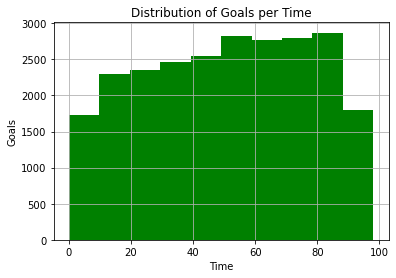

In [40]:
df_scores = df_events[df_events["is_goal"] == True] # delete is_goal if it is False
df_scores = df_scores.loc[:,["time"]]               # get time
df_scores.hist(color="green")                       # draw histogram
plt.title("Distribution of Goals per Time")
plt.xlabel("Time")
plt.ylabel("Goals")
plt.show()

## Q5. shots outcome
 We want to create a DataFrame containing the total number of (1-On target, 2-Off target, 3-Blocked, 4-Hit the post)shot outcomes for four quarters of a game. You must create a 4-row and 4-column DataFrame for shot outcomes and the time they happend.<br>
### Four quarters:
1. 0 to 25
2. 25 to 45
3. 45 to 70
4. 70 to ...

In [41]:
dic_shot = {       # dictionary for shot outcomes based on given data
    1: "On target",
    2: "Off target",
    3: "Blocked",
    4: "Hit the post"
}
quarters = ["0 to 25", "25 to 45", "45 to 70", "70 to End"]   # four quarters based on given data

df_shotOut = df_events[df_events["shot_outcome"] > 0]         # delete NaN shot outcomes
df_shotOut = df_shotOut.loc[:, ["time","shot_outcome"]]       # get time and shot outcomes
df_shotOut["shot_outcome names"] = df_shotOut["shot_outcome"].map(dic_shot) # map with dic_shot dictionary

del df_shotOut["shot_outcome"]    # delete shot outcome - no need anymore because we have their names

# assign quarters to the times
df_shotOut["quarters"] = df_shotOut["time"].apply(lambda x: quarters[0] if x < 25 else 
                                                  (quarters[1] if x < 45 else 
                                                   (quarters[2] if x < 70 else quarters[3])) )

del df_shotOut["time"] # delete time - no need anymore because we have quarters

df_shotOut = df_shotOut.groupby(["shot_outcome names", "quarters"]).size() # get size
df_shotOut = df_shotOut.values.reshape(4, 4) # shafe 4 to 4
df_shotOut = pd.DataFrame(df_shotOut)        # convert ot DataFrame
df_shotOut.columns = [quarters[0], quarters[1], quarters[2], quarters[3]] # put names to columns based on quarters
df_shotOut.index = ["Blocked", "Hit the post", "Off target", "On target"] # put names to rows based on the output in line that we called groupby (go 4 lines up to find groupby)
print(df_shotOut)

              0 to 25  25 to 45  45 to 70  70 to End
Blocked         12023     11664     15578      14817
Hit the post      744       752      1026       1053
Off target      21532     19389     26540      25366
On target       17259     15843     22443      22469


## Q6. Find the mean of events in diffrent years
1. We want to create a DataFrame containing the average of #event_type for diffrent years.The dataframe must have 11 rows for each event_type.
2. plot the result in a way that you think is more informative.
 

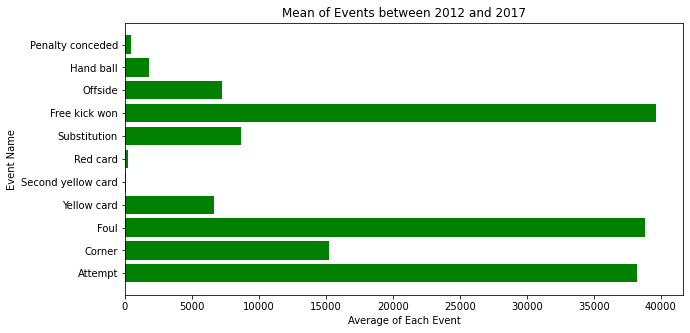

In [42]:
# part 1 of Q6
df_avg = df_events.merge(df_ginf, on="id_odsp") # merge df_events and df_ginf
df_avg = df_avg.loc[:,["id_odsp", "event_type", "season"]] # get these columns
df_avg = df_avg.groupby(["event_type", "season"]).size() # get size
df_avg = df_avg.reset_index() # put index
df_avg.columns = ["event_type", "season", "repeats"] # set names for columns
df_avg = df_avg.groupby(["event_type"])["repeats"].mean() # calculate average
df_avg = df_avg.reset_index() # put index
df_avg.columns = ["event_type", "mean of events"] # set names for columns
df_avg["event_name"] = df_avg["event_type"].map(dic_eventType) # map with dic_eventType dictionary
del df_avg["event_type"] # delete event_type - no need anymore

# part 2 of Q6
plt.figure(figsize=(10,5)) 
plt.barh(df_avg["event_name"], df_avg["mean of events"], color="green")
plt.title("Mean of Events between 2012 and 2017")
plt.xlabel("Average of Each Event")
plt.ylabel("Event Name")
plt.show()

## Q7. Most-scoring leages
Sort the leages by the average of scores in a season.

In [43]:
df_scores = df_ginf.loc[:,["season", "league", "fthg","ftag"]]
df_scores["scores"] = df_scores["fthg"] + df_scores["ftag"] # sum scores in scores column
df_scores = df_scores.groupby(["league","season"])["scores"].mean().to_frame() # mean scores in each season for each league
df_scores.columns = ["average of scores"] # put column name
df_scores.sort_values(["season","average of scores"], ascending=[False,False], inplace=True) # sort values based on avg
print(df_scores)

               average of scores
league season                   
SP1    2017             2.904762
E0     2017             2.863636
I1     2017             2.753623
D1     2017             2.666667
F1     2017             2.509615
D1     2016             2.821429
SP1    2016             2.744737
E0     2016             2.700000
I1     2016             2.576316
F1     2016             2.526316
D1     2015             2.752443
I1     2015             2.694737
SP1    2015             2.655263
E0     2015             2.565789
F1     2015             2.492105
D1     2014             3.135036
E0     2014             2.862500
SP1    2014             2.750000
I1     2014             2.723684
F1     2014             2.456464
D1     2013             2.931148
SP1    2013             2.871053
I1     2013             2.638522
F1     2013             2.560322
D1     2012             2.843537
SP1    2012             2.780899
I1     2012             2.563536
F1     2012             2.524457


## Q8. Find the games that the away team won by 3 or more goal diffrence.

In [44]:
df_3diff = df_ginf.loc[:,["ht", "at", "fthg", "ftag"]]
df_3diff["has_3diff"] = df_3diff["ftag"] - df_3diff["fthg"] >= 3
df_3diff = df_3diff[df_3diff.has_3diff == True] # filter based on has_3diff
del df_3diff["has_3diff"] # delete has_3diff - no need anymore
print(df_3diff.to_string(index=False))

                        ht                       at  fthg  ftag
                FC Cologne            VfL Wolfsburg     0     3
                 Dijon FCO             Stade Rennes     1     5
            Kaiserslautern            Bayern Munich     0     3
             Real Zaragoza              Real Madrid     0     6
               FC Augsburg         Bayer Leverkusen     1     4
                     Mainz           TSG Hoffenheim     0     4
          Bayer Leverkusen               FC Cologne     1     4
                   Sochaux             Stade Rennes     2     6
               Montpellier      Paris Saint-Germain     0     3
            Internazionale                   Napoli     0     3
                  Espanyol              Real Madrid     0     4
                    Malaga              Real Madrid     0     4
                Villarreal                  Levante     0     3
                  Cagliari                    Lazio     0     3
                FC Cologne Borussia Monc

## Q9. Find the two players with most event together. 

In [45]:
df_2players = df_events.loc[(df_events["player"]).isna() == False] # delete NaN in player
df_2players = df_2players.loc[(df_2players["player2"]).isna() == False] # delete NaN in player2
df_2players = df_2players.loc[:,["player", "player2"]]
df_2players["is_same"] = df_2players["player"] == df_2players["player2"] # delete same two players
df_2players = df_2players[df_2players.is_same == False]
del df_2players["is_same"] # delete is_same column - no need anymore

merge_2players = list(zip(df_2players["player"], df_2players["player2"])) # get player and player2 together in a list
sortedValues = [] # it has sorted values of merge_2players
for x in merge_2players:
    sortedValues.append(tuple(sorted(x))) # call sorted and append to sortedValues list
df_2players["pair of two players"] = sortedValues # assign to a column of df_2players
df_2players = df_2players.groupby(["pair of two players"]).size().to_frame() # get size
df_2players.columns = ["counts"] # put column name
df_2players = df_2players.sort_values(["counts"], ascending=False) # sort based on counts

print(df_2players.head(10)) # print top 10 two players with most event together

                                        counts
pair of two players                           
(lionel messi, neymar)                     177
(cristiano ronaldo, karim benzema)         162
(lionel messi, luis suarez)                143
(lorenzo insigne, marek hamsik)            137
(dani alves, lionel messi)                 129
(cristiano ronaldo, marcelo)               125
(cristiano ronaldo, luka modric)           104
(german denis, maximiliano moralez)        100
(andrepierre gignac, mathieu valbuena)      99
(gonzalo castro, stefan kiessling)          98


## Q10. sort the players with most (goals+assist)

In [46]:
df_goas = df_events[df_events.is_goal == True] # delete no goals rows
df_goas = df_goas[df_goas.event_type2 != 15] # delete Own goal (15 = Own goal)
df_goas = df_goas.loc[:,["player", "player2"]] # get players

df_goals = df_goas["player"].value_counts().to_frame() # counts most of player
df_goals = df_goals.reset_index() # put index
df_goals.columns = ["name", "goals"] # put columns

df_assists = df_goas["player2"].value_counts().to_frame() # counts most of player2
df_assists = df_assists.reset_index() # put index
df_assists.columns = ["name", "assists"] # put columns

df_goas = df_goals.merge(df_assists, on="name") # merge by name
df_goas["goals+assist"] = df_goas["goals"] + df_goas["assists"] # calculate goals+assists
df_goas = df_goas.sort_values(["goals+assist"], ascending=False) # sort them
print(df_goas.to_string(index=False))

                      name  goals  assists  goals+assist
              lionel messi    205       75           280
         cristiano ronaldo    197       53           250
        zlatan ibrahimovic    153       47           200
        robert lewandowski    124       27           151
           gonzalo higuain    118       28           146
               luis suarez     96       44           140
            edinson cavani    121       14           135
  pierreemerick aubameyang    100       30           130
             karim benzema     85       43           128
            alexis sanchez     80       43           123
               diego costa     93       28           121
             thomas muller     67       46           113
       alexandre lacazette     88       19           107
            gonzalo castro     39       66           105
                marco reus     65       40           105
             dimitri payet     44       60           104
              marek hamsik     

## Q11. 
In this section we want to have a comparison between np built-in functions and pure python performance in terms of time.<br>
we have declared an abstract class named Base_compare which has two functions:
1. time_function:It gets the np.ndarray as input and do some function(for example sum function) on it and returns the time which took the system to run the function.
2. calculate:This function is a simple for loop(i from 1 to max_length with step=step) that builds a random np.ndarray with length=i then it calls time_function on the array.calculate function returns the length of each array and the time taken to do the function on the corresponding array in a pandas.DataFrame.



1. Complete the time_functions in the two classes below.
2. Initialize one object of each class.
3. Run calculate function for the two objects you made.
4. Concatenate the result into a single dataframe.
5. Plot the dataframe.
6. What do you understand from the figure.
7. Why is there a bump in the times taken by system?(Extra points)    
8. Why did we make the abstract function?and how could we do it better?(Extra points)  <br>


In [47]:
from abc import abstractmethod
class Base_model:

  def __init__(self,iteration=100,max_length=1000,step=10):
    self.iteration = iteration
    self.max_length = max_length
    self.step = step

  def calculate(self):
    info = []
    for i in range(1, self.max_length + 1, self.step):
        arr = np.random.rand(i)
        time = self.time_function(arr)
        info.append([i, time])
    return pd.DataFrame(info)
  
  @abstractmethod
  def time_function(self,array):
    pass
  
 
    

In [48]:
class Np_bulitin_sum(Base_model):
  def __init__(self,iteration=100,max_length=1000,step=10):
    super().__init__(iteration=iteration,max_length=max_length,step=step)

  def time_function(self,array): # part 1 of Q11
    startTime = time.time()
    np.sum(array)
    endTime = time.time()
    elapsedTime = endTime - startTime
    return elapsedTime
    


In [49]:
class Pure_python_sum(Base_model):

  def __init__(self,iteration=100,max_length=1000,step=10):
    super().__init__(iteration=iteration,max_length=max_length,step=step)
    
  def time_function(self,array): # part 1 of Q11
    startTime = time.time()
    sum(array)
    endTime = time.time()
    elapsedTime = endTime - startTime
    return elapsedTime

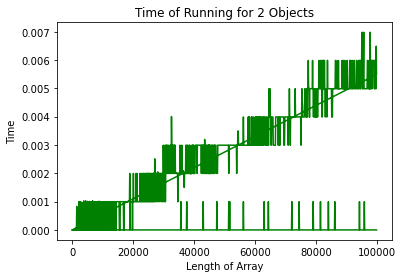

In [53]:
pure_obj = Pure_python_sum(1, 100000, 100) # part 2 of Q11
Np_obj = Np_bulitin_sum(1, 100000, 100) # part 2 of Q11

df_pure = pure_obj.calculate() # part 3 of Q11
df_Np = Np_obj.calculate() # part 3 of Q11

df_result = pd.concat([df_pure, df_Np]) # part 4 of Q11
df_result.columns = ["len", "time"]

# part 5 of Q11
plt.plot(df_result["len"], df_result["time"], color="green")
plt.title("Time of Running for 2 Objects")
plt.xlabel("Length of Array")
plt.ylabel("Time")
plt.show()

### Part 6 of Q11
6. When length of array is large, Pure_python_sum function spends for time than Np_bulitin_sum function but when length of array is small, it's almost opposite

### Part 7 of Q11
7. it may because of scheduler in OS that gives Pure_python_sum fucntion to execute a bit more so it costs less time than before itself and on the other hand in Np_bulitin_sum function it costs a bit more time than before itself as you can see in the plot 

### Part 8 of Q11
8.a To use OOP programming that is more efficient and also because calculating the time may be different in some cases.

8.b In this case, calculating the time for both Pure_python_sum and Np_bulitin_sum are same so we can do it once in the abstract class Base_model